<a href="https://colab.research.google.com/github/ahmadSum1/NTNU_mscThesis/blob/SAHI/SAHI_inference_for_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Preperation

- Install latest version of SAHI and YOLOv5:

In [1]:
!pip install -U torch sahi yolov5

  Using cached torch-2.0.1-cp39-cp39-manylinux1_x86_64.whl (619.9 MB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl (21.0 MB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl (849 kB)
  Using cached triton-2.0.0-1-cp39-cp39-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (63.3 MB)
  Using cached nvidia_cufft_cu11-10.9.0.58-py3-none-manylinux1_x86_64.whl (168.4 MB)
  Using cached nvidia_nvtx_cu11-11.7.91-py3-none-manylinux1_x86_64.whl (98 kB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl (317.1 MB)
  Using cached nvidia_curand_cu11-10.2.10.91-py3-none-manylinux1_x86_64.whl (54.6 MB)
  Using cached nvidia_cusolver_cu11-11.4.0.1-2-py3-none-manylinux1_x86_64.whl (102.6 MB)
  Using cached nvidia_cuda_cupti_cu11-11.7.101-py3-none-manylinux1_x86_64.whl (11.8 MB)
  Using cached nvidia_nccl_cu11-2.14.3-py3-none-manylinu

In [2]:
import os
os.getcwd()

'/notebooks'

- Import required modules:

In [3]:
# arrange an instance segmentation model for test
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [4]:
import torch
device = "cpu"

if torch.cuda.is_available():
   print("Training on GPU")
   device = "cuda:0"

Training on GPU


- Download a yolov5 model and two test images:

In [5]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov5_model_path = 'models/yolov5s6.pt'
download_yolov5s6_model(destination_path=yolov5_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv5 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [6]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov5',
    model_path=yolov5_model_path,
    confidence_threshold=0.3,
    device= device
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [7]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [8]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

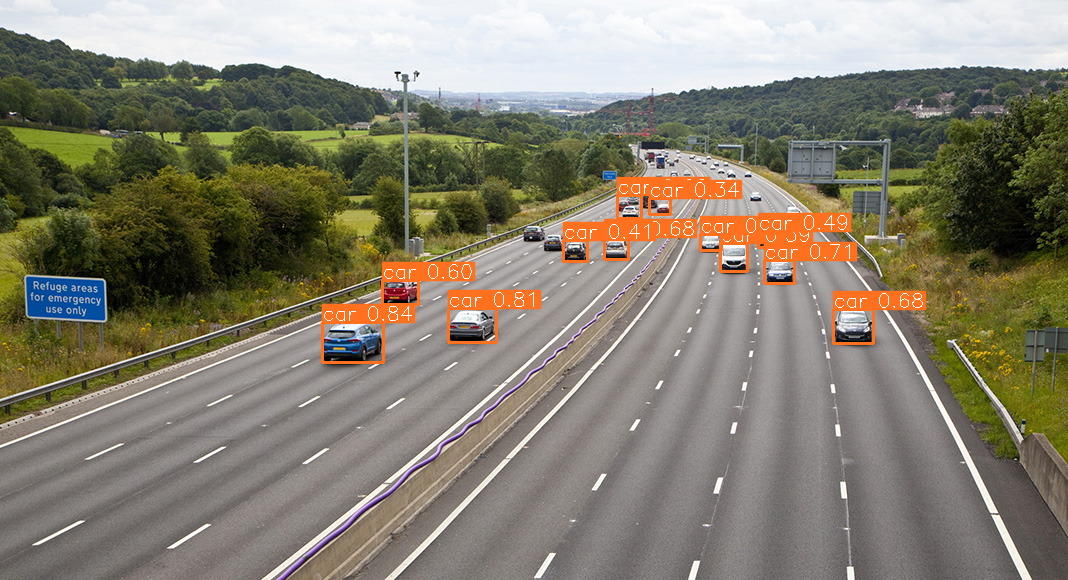

In [9]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv5 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [10]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

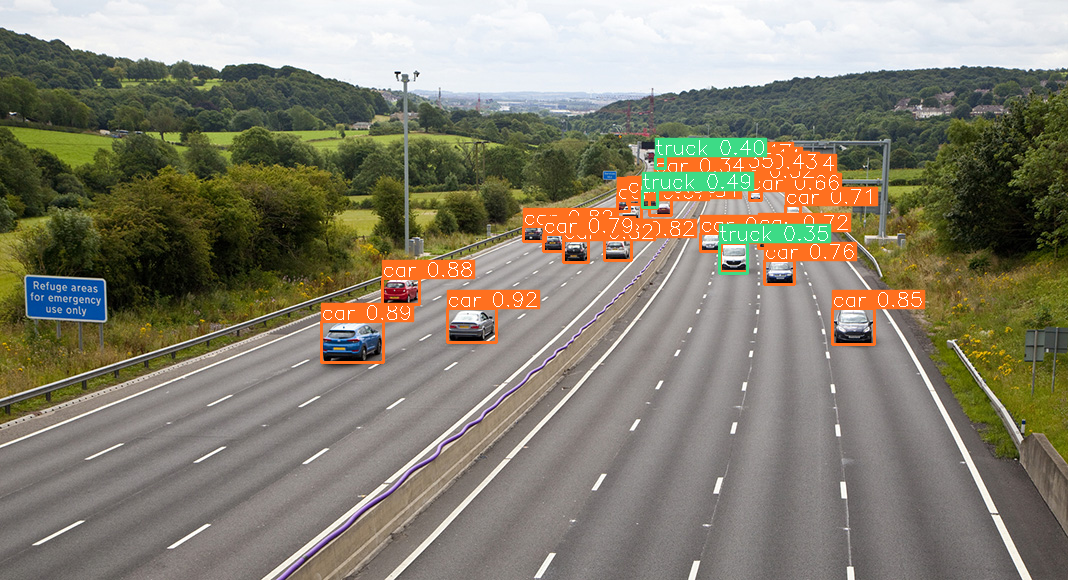

In [11]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [12]:
object_prediction_list = result.object_prediction_list

In [13]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447.5549201965332, 308.2520980834961, 496.9109191894531, 342.7996826171875), w: 49.35599899291992, h: 34.547584533691406>,
    mask: None,
    score: PredictionScore: <value: 0.9153607487678528>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [14]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447.5549201965332,
   308.2520980834961,
   49.35599899291992,
   34.547584533691406],
  'score': 0.9153607487678528,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1705},
 {'image_id': None,
  'bbox': [321.4343795776367,
   321.9066390991211,
   62.17609405517578,
   40.92494583129883],
  'score': 0.8879493474960327,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2544},
 {'image_id': None,
  'bbox': [382.052490234375,
   278.42694091796875,
   36.962157249450684,
   26.3555908203125],
  'score': 0.8796254992485046,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 974}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [15]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447.5549201965332,
   308.2520980834961,
   49.35599899291992,
   34.547584533691406],
  'score': 0.9153607487678528,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1705},
 {'image_id': 1,
  'bbox': [321.4343795776367,
   321.9066390991211,
   62.17609405517578,
   40.92494583129883],
  'score': 0.8879493474960327,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2544},
 {'image_id': 1,
  'bbox': [382.052490234375,
   278.42694091796875,
   36.962157249450684,
   26.3555908203125],
  'score': 0.8796254992485046,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 974}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [16]:
# !pip install imantics
!pip install -U fiftyone

In [17]:
# result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [18]:
result.to_fiftyone_detections()[:3]

[<Detection: {
     'id': '6465d7ee69267ecf464722ff',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.41905891404169776,
         0.5314691346267174,
         0.046213482203108544,
         0.0595648009201576,
     ],
     'mask': None,
     'confidence': 0.9153607487678528,
     'index': None,
 }>,
 <Detection: {
     'id': '6465d7ee69267ecf46472300',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.3009685202037797,
         0.5550114467226226,
         0.05821731653106346,
         0.07056025143327384,
     ],
     'mask': None,
     'confidence': 0.8879493474960327,
     'index': None,
 }>,
 <Detection: {
     'id': '6465d7ee69267ecf46472301',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.35772705078125,
         0.4800464498585668,
         0.03460876146952311,
         0.045440673828125,
     ],
     'mask': None,
     'confidence': 0.87962

## 4. Batch Prediction

- Set model and directory parameters:

In [19]:
model_type = "yolov5"
model_path = yolov5_model_path
model_device =  device
model_confidence_threshold = 0.4

slice_height = 50
slice_width = 50
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [20]:
pred=predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)


05/18/2023 07:46:54 - INFO - httpx -   HTTP Request: POST https://www.google-analytics.com/collect "HTTP/1.1 200 OK"


There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 405 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [00:04<00:09,  4.97s/it]

Prediction time is: 4920.44 ms
Performing prediction on 442 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:10<00:05,  5.17s/it]

Prediction time is: 5267.18 ms
Performing prediction on 405 number of slices.


Performing inference on images: 100%|██████████| 3/3 [00:15<00:00,  5.11s/it]

Prediction time is: 5000.06 ms
Prediction results are successfully exported to runs/predict/exp3


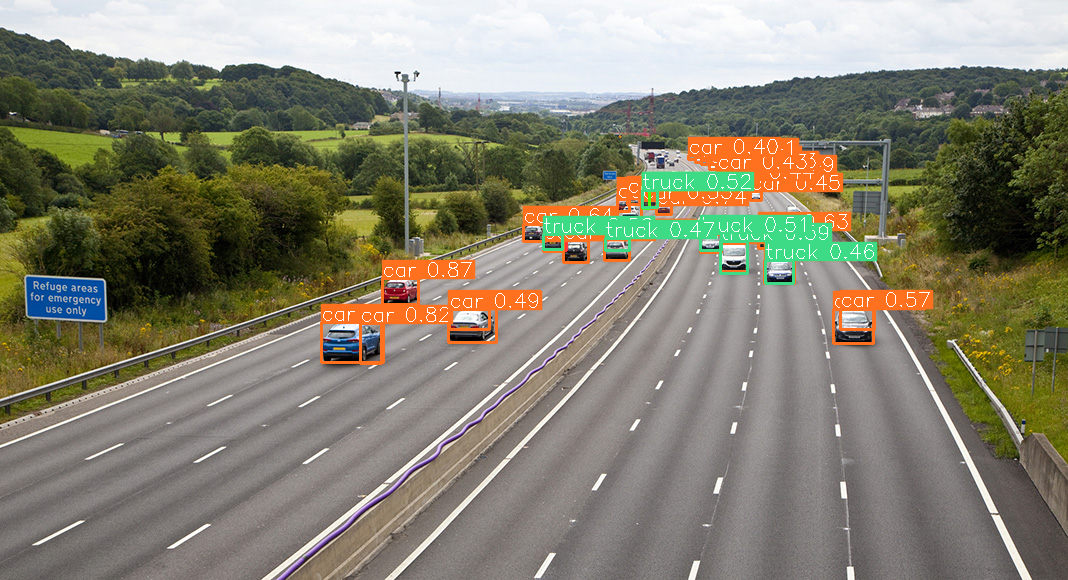

In [22]:
Image("runs/predict/exp3/visuals/small-vehicles1.png")